In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/player-scores/players.csv
/kaggle/input/player-scores/leagues.csv
/kaggle/input/player-scores/competitions.csv
/kaggle/input/player-scores/games.csv
/kaggle/input/player-scores/player_valuations.csv
/kaggle/input/player-scores/appearances.csv
/kaggle/input/player-scores/clubs.csv


In [2]:
df_players= pd.read_csv("/kaggle/input/player-scores/players.csv")
df_players.head()

,player_id,last_season,current_club_id,name,pretty_name,country_of_birth,country_of_citizenship,date_of_birth,position,sub_position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,url
0,254016,2013,855,arthur-delalande,Arthur Delalande,France,France,1992-05-18,Midfield,midfield - Central Midfield,Right,186,NaN,90000.0,https://www.transfermarkt.co.uk/arthur-delalan...
1,51053,2013,23,daniel-davari,Daniel Davari,Germany,Iran,1988-01-06,Goalkeeper,Goalkeeper,Right,192,135000.0,1130000.0,https://www.transfermarkt.co.uk/daniel-davari/...
2,31451,2013,23,torsten-oehrl,Torsten Oehrl,Germany,Germany,1986-01-07,Attack,attack - Centre-Forward,Right,192,NaN,1130000.0,https://www.transfermarkt.co.uk/torsten-oehrl/...
3,44622,2013,3691,vladimir-kisenkov,Vladimir Kisenkov,UdSSR,Russia,1981-10-08,Defender,Defender - Right-Back,Right,182,NaN,720000.0,https://www.transfermarkt.co.uk/vladimir-kisen...
4,30802,2013,3302,oscar-diaz,Oscar Diaz,Spain,Spain,1984-04-24,Attack,attack - Centre-Forward,Right,183,NaN,1080000.0,https://www.transfermarkt.co.uk/oscar-diaz/pro...


In [3]:
df_player_valuations= pd.read_csv("/kaggle/input/player-scores/player_valuations.csv")
df_player_valuations.head()

,player_id,date,market_value
0,254016,2013-07-22,90000
1,254016,2014-01-14,90000
2,51053,2008-08-25,90000
3,51053,2011-05-30,90000
4,51053,2011-08-26,225000


In [4]:
df_appearances= pd.read_csv("/kaggle/input/player-scores/appearances.csv")
df_appearances= df_appearances[df_appearances["goals"]>0]
df_appearances.sort_values('goals', ascending=False)





,player_id,game_id,appearance_id,competition_id,player_club_id,goals,assists,minutes_played,yellow_cards,red_cards
73839,191891,2496924.0,2496924_191891,NLP,610,6,2,90,0,0
72432,8198,2475468.0,2475468_8198,ES1,418,5,0,90,0,0
138511,38253,2581642.0,2581642_38253,L1,27,5,0,45,0,0
924467,45146,3613211.0,3613211_45146,TR1,3840,5,0,90,0,0
132783,52530,2458330.0,2458330_52530,DFB,533,5,1,63,0,0
...,...,...,...,...,...,...,...,...,...,...
369669,109217,2722817.0,2722817_109217,TR1,6890,1,1,90,0,0
369667,109217,2722795.0,2722795_109217,TR1,6890,1,0,90,1,0
369661,109217,2722738.0,2722738_109217,TR1,6890,1,0,90,0,0
369659,168856,2818525.0,2818525_168856,GR1,6418,1,0,32,0,0


In [5]:
df_appearances= pd.read_csv("/kaggle/input/player-scores/appearances.csv")
df_appearances= df_appearances[df_appearances["assists"]>0]
df_appearances.sort_values('assists', ascending=False)


,player_id,game_id,appearance_id,competition_id,player_club_id,goals,assists,minutes_played,yellow_cards,red_cards
738485,9618,3288603.0,3288603_9618,SFA,2553,0,6,90,0,0
615526,391005,3076905.0,3076905_391005,ELQ,190,0,4,90,0,0
842935,132098,3420846.0,3420846_132098,GB1,148,1,4,84,0,0
655186,152963,3203561.0,3203561_152963,L1,167,0,4,90,0,0
371487,16589,2722777.0,2722777_16589,TR1,2944,1,4,90,0,0
...,...,...,...,...,...,...,...,...,...,...
363158,7520,2764441.0,2764441_7520,GRP,683,1,1,90,0,0
363191,173192,2847147.0,2847147_173192,SC1,2999,0,1,37,0,0
363198,5870,2728516.0,2728516_5870,SC1,2999,1,1,90,0,0
363209,5870,2728633.0,2728633_5870,SC1,2999,0,1,82,0,0


In [6]:
df_appearances= pd.read_csv("/kaggle/input/player-scores/appearances.csv")
df1=df_appearances.copy()
join= df1.merge(df_players, on=['player_id'])
# join=join.drop(['game_id', 'player_club_id', 'yellow_cards', 'red_cards', 'appearance_id', 'country_of_birth', 'country_of_citizenship',], axis=1)

join=join.groupby('player_id').agg(lambda col: np.sort(col.unique()).tolist())

def aggregate(x):
    return sum(x)

join['total_minutes_played']=join['minutes_played'].apply(aggregate)
join['total_goals']=join['goals'].apply(aggregate)
join['total_assists']=join['assists'].apply(aggregate)
join['direct_goal_contribution']=join['total_assists']+join['total_goals']
target=['player_id','pretty_name', 'date_of_birth', 'position', 'sub_position','foot','height_in_cm', 'highest_market_value_in_gbp', 'url','total_minutes_played','total_goals','total_assists','direct_goal_contribution',]
def name(x):
    return x[0]
join['pretty_name']= join['pretty_name'].apply(name)
for item in join.columns:
    if item not in target:
        del join[item]
join=join.sort_values('direct_goal_contribution', ascending=False)
join.head()



,pretty_name,date_of_birth,position,sub_position,foot,height_in_cm,highest_market_value_in_gbp,url,total_minutes_played,total_goals,total_assists,direct_goal_contribution
player_id,,,,,,,,,,,,
30418,Marcus Berg,[1986-08-17],[Attack],[attack - Centre-Forward],[Right],[184],[9900000.0],[https://www.transfermarkt.co.uk/marcus-berg/p...,2323,15,3,18
8198,Cristiano Ronaldo,[1985-02-05],[Attack],[attack - Centre-Forward],[Right],[187],[108000000.0],[https://www.transfermarkt.co.uk/cristiano-ron...,2118,15,3,18
26399,Sergio Aguero,[1988-06-02],[Attack],[attack - Centre-Forward],[Right],[173],[72000000.0],[https://www.transfermarkt.co.uk/sergio-aguero...,3122,15,3,18
38253,Robert Lewandowski,[1988-08-21],[Attack],[attack - Centre-Forward],[Right],[185],[81000000.0],[https://www.transfermarkt.co.uk/robert-lewand...,2522,15,3,18
132098,Harry Kane,[1993-07-28],[Attack],[attack - Centre-Forward],[Right],[188],[135000000.0],[https://www.transfermarkt.co.uk/harry-kane/pr...,2122,10,7,17


Text(0.5, 1.0, 'Players Goals per 90')

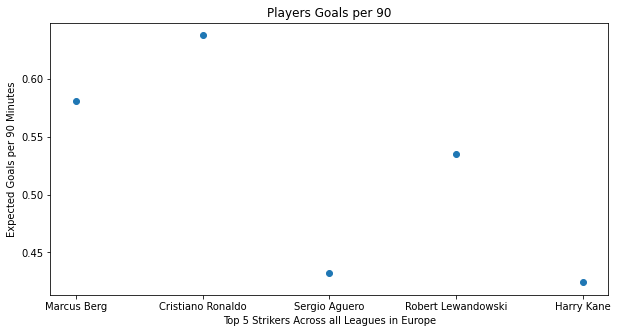

In [7]:
def p90_Calculator(total_goals,total_minutes_played):
    return total_goals/(total_minutes_played/90)


# join['goals_per_90']=join['total_minutes_played'].apply(p90_Calculator)
join['goals_per_90']=p90_Calculator(join.total_goals,join.total_minutes_played)
join.head()


player=join['pretty_name'][0:5]
goals_per_90_minutes=join['goals_per_90'][0:5]
plt.figure(figsize=(10, 5))
plt.scatter(player, goals_per_90_minutes)
plt.xlabel('Top 5 Strikers Across all Leagues in Europe')
plt.ylabel('Expected Goals per 90 Minutes')
plt.title('Players Goals per 90')

In [8]:
df_leagues= pd.read_csv("/kaggle/input/player-scores/leagues.csv")
df_leagues.head()

,league_id,name,confederation
0,L1,bundesliga,europa
1,NL1,eredivisie,europa
2,BE1,jupiler-pro-league,europa
3,ES1,laliga,europa
4,PO1,liga-nos,europa
